In [3]:
from InputHandler import ImageReader
import tensorflow as tf
import sys
from PIL import Image # image class read
import skimage.io as io # image rgb read

import os
import scipy as scp
import scipy.misc

import numpy as np
import logging
import tensorflow as tf
import sys

from models.FCN import fcn8_vgg
from models.FCN import utils

from tensorflow.python.framework import ops
logging.basicConfig(format='%(asctime)s %(levelname)s %(message)s',
                    level=logging.INFO,
                    stream=sys.stdout)


In [4]:
DATA_DIRECTORY = '/media/jeongjaepark/PERL/NeuralNetworkDataset/PascalVOCC/VOC2012/train/VOCdevkit/VOC2012'
DATA_LIST_PATH = '/media/jeongjaepark/PERL/NeuralNetworkDataset/PascalVOCC/VOC2012/train/VOCdevkit/VOC2012/ImageSets/Segmentation/train.txt'

tfrecords_filename = './models/FCNpascal_voc_segmentation.tfrecords'
input_size=(332,332)
train_data=ImageReader(DATA_DIRECTORY,DATA_LIST_PATH,tfrecords_filename,input_size)

X=tf.placeholder(tf.float32,[None, 332,332,3])
Y=tf.placeholder(tf.float32,[None,332,332,1])

vgg_fcn = fcn8_vgg.FCN8VGG()
with tf.name_scope("content_vgg"):
    vgg_fcn.build(X, debug=True)
    print('Finished building Network.')

Train data: 100/1464
Train data: 200/1464
Train data: 300/1464
Train data: 400/1464
Train data: 500/1464
Train data: 600/1464
Train data: 700/1464
Train data: 800/1464
Train data: 900/1464
Train data: 1000/1464
Train data: 1100/1464
Train data: 1200/1464
Train data: 1300/1464
Train data: 1400/1464
2018-07-16 15:15:38,883 INFO Load npy file from '/home/jeongjaepark/NeuralNetwork/Semantic_segmentation/Woolverine/models/FCN/vgg16.npy'.
npy file loaded
Layer name: conv1_1
Layer shape: (3, 3, 3, 64)
2018-07-16 15:15:39,439 INFO Creating Summary for: conv1_1/filter
2018-07-16 15:15:39,452 INFO Creating Summary for: conv1_1/biases
Layer name: conv1_2
Layer shape: (3, 3, 64, 64)
2018-07-16 15:15:39,471 INFO Creating Summary for: conv1_2/filter
2018-07-16 15:15:39,485 INFO Creating Summary for: conv1_2/biases
Layer name: conv2_1
Layer shape: (3, 3, 64, 128)
2018-07-16 15:15:39,505 INFO Creating Summary for: conv2_1/filter
2018-07-16 15:15:39,518 INFO Creating Summary for: conv2_1/biases
Layer n

In [5]:
epoch=1
batch_size=20
image,annotation=train_data.read_and_decode(tfrecords_filename,epoch,batch_size)
loss=tf.nn.softmax_cross_entropy_with_logits(logits=tf.cast(vgg_fcn.pred_up,tf.float32), labels=Y)

init_op = tf.group(tf.global_variables_initializer(),tf.local_variables_initializer())
with tf.Session()  as sess:
    sess.run(init_op)
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(coord=coord)
    # Let's read off 3 batches just for example

    i=0
    try:
        while not i:
            i=i+1
            if not i % 2:
                print('Train data: {}'.format(i))
                sys.stdout.flush()
            
            img, anno = sess.run([image, annotation])
            
#           feed_dict = {X: img}
#           tensors = [vgg_fcn.pred_up,vgg_fcn.upscore32]
#           up,up_32 = sess.run(tensors, feed_dict=feed_dict)
            feed_dict = {X: img, Y: anno}
            tensors = [loss]
            lss = sess.run(tensors, feed_dict=feed_dict)            
    except tf.errors.OutOfRangeError:
        print('Done training, epoch reached')
    
    #img1, anno1 = sess.run([image, annotation])
    coord.request_stop()
    # Wait for threads to stop
    coord.join(threads)
    sess.close()

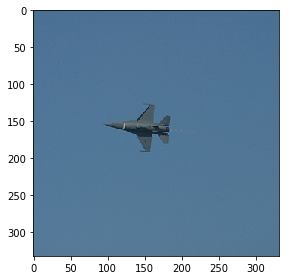

In [6]:
io.imshow(img[0, :, :, :])
io.show()

In [ ]:
io.imshow(img[4, :, :, :])
io.show()

In [ ]:
vgg_fcn.data_dict

In [7]:
a=up[0]
b=img[0]
c=anno[0]

NameError: name 'up' is not defined

In [ ]:
loss=tf.nn.softmax_cross_entropy_with_logits(logits=tf.cast(vgg_fcn.pred_up,tf.float32), labels=Y)

In [ ]:
vgg_fcn.pred_up

In [ ]:
Y=tf.placeholder(tf.float32,[None,332,332,1])

In [ ]:
vgg_fcn.pred_up

In [ ]:
loss=tf.nn.softmax_cross_entropy_with_logits(logits=tf.cast(vgg_fcn.pred_up,tf.float32), labels=Y)

In [ ]:
Y=tf.placeholder(tf.float32,[None,332,332])

In [ ]:
vgg_fcn.pred_up,tf.float32

In [ ]:
tf.cast(vgg_fcn.pred_up,tf.float32)

In [ ]:
anno.shape

In [ ]:
upscore32

In [ ]:
a.shape

In [ ]:
tf.stack([vgg_fcn.pred_up])

In [ ]:
up.shape

In [ ]:
from models.FCN import fcn8_vgg